<a href="https://colab.research.google.com/github/ksy-20908/godoheon/blob/main/%EC%B6%A9%EB%82%A8%EB%8C%80_%EB%B0%B0%EC%9E%AC%EB%8C%80_AI_%EB%94%A5%EB%9F%AC%EB%8B%9D_2%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### 도구 준비
import os
import shutil

# as는 뒷글자로 축약해서 글에 사용하겠다는 의미임
import tensorflow as tf # 텐서플로우
import matplotlib.pyplot as plt # 시각화 도구
%matplotlib inline
import matplotlib.font_manager as fm
import numpy as np # tensorflow의 숫자를 쓰는 것(무조건 필요)

print(f'Tensorflow 버전을 확인합니다: {tf.__version__}')

Tensorflow 버전을 확인합니다: 2.3.0


In [ ]:
# 나눔폰트 다운
!apt install -qq -y fonts-nanum*
### 시각화 도구 (matplotlib) 한글 폰트
fonts = fm.findSystemFonts()
nanum_path = None
for font in fonts:
    if font.endswith('NanumGothic.ttf'):
        nanum_path = font
        break
if nanum_path == None:
    print(f'나눔 폰트를 설치해야 합니다!')
    print(f'!apt install -qq -y fonts-nanum*')
else:
    print(f'나눔 폰트 경로: {nanum_path}')
    nanum_prop = fm.FontProperties(fname=nanum_path)

fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
나눔 폰트 경로: /usr/share/fonts/truetype/nanum/NanumGothic.ttf


In [ ]:
### Tensorflow Keras Datasets
dataset_path = os.path.abspath(os.path.expanduser('~/.keras/datasets/'))
if os.path.exists(dataset_path):
    shutil.rmtree(dataset_path)
(_train_images, train_labels), (_test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
### MNIST Fashion 데이터 개수
print(f'학습에 사용할 이미지는 {len(_train_images)}개 입니다.')
print(f'학습한 후 테스트(검증)에 사용할 이미지는 {len(_test_images)}개 입니다.')

학습에 사용할 이미지는 60000개 입니다.
학습한 후 테스트(검증)에 사용할 이미지는 10000개 입니다.


In [ ]:
### MNIST Fashion Label(레이블 번호와 라벨을 만듬)
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트',
               '샌들', '셔츠', '운동화', '가방', '부츠']
print(f'데이터의 레이블은 {len(class_names)}개 이며, 데이터셋에 포함되어 있지 않으므로 설명서에서 확인해야 합니다.')
print('레이블 번호와 라벨: ')
for i in range(0, len(class_names)):
    print(f'{i}: {class_names[i]}')

데이터의 레이블은 10개 이며, 데이터셋에 포함되어 있지 않으므로 설명서에서 확인해야 합니다.
레이블 번호와 라벨: 
0: 티셔츠
1: 바지
2: 스웨터
3: 드레스
4: 코트
5: 샌들
6: 셔츠
7: 운동화
8: 가방
9: 부츠


In [ ]:
### Data Dimension (Numpy Dimension) (흑백으로 만들어진 2차원 데이터임)
print(f'학습 이미지 형태: {_train_images.shape}')
print(f'학습 레이블 형태: {train_labels.shape}')

print(f'테스트 이미지 형태: {_test_images.shape}')
print(f'테스트 레이블 형태: {test_labels.shape}')

학습 이미지 형태: (60000, 28, 28)
학습 레이블 형태: (60000,)
테스트 이미지 형태: (10000, 28, 28)
테스트 레이블 형태: (10000,)


In [ ]:
### 이미지 0번 데이터
_train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

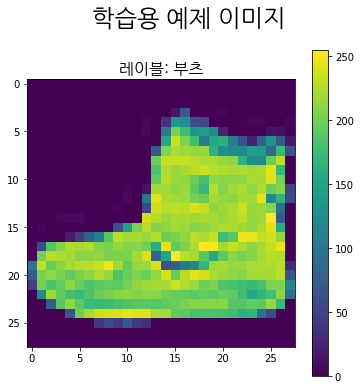

In [ ]:
### 학습용 예제 이미지 확인!
fig1 = plt.figure(figsize=(6, 6))
ax = fig1.add_subplot()
axm = ax.imshow(_train_images[0]) #_train_images[n](n만 바꾸면 n번에 무슨 이미지있는지 확인 가능)
fig1.colorbar(axm)
fig1.suptitle('학습용 예제 이미지', fontproperties=nanum_prop, fontsize=24)
ax.set_title(f'레이블: {class_names[train_labels[0]]}', fontproperties=nanum_prop, fontsize=16)
ax.grid(False)

In [ ]:
### -1.0 ~ 1.0 데이터를 주로 받는 신경망! (Neural Network) (딥러닝이라고 부르는 학습공간에서는 -1.0 ~ 1.0데이터로 학습시키는 게 가장 잘됨) (정규화) 
### (소수를 사용하면 정수로 하는것 보다 더 정확하고 무한대까지 사용가능)
print('인공 신경망은 주로 -1.0 ~ 1.0 사이의 값을 받습니다.')
print('따라서 이미지를 255로 나누어줍니다.')
train_images = _train_images / 255.0 # 255.0이 최댓값이므로 255.0으로 나누어준다
test_images = _test_images / 255.0

인공 신경망은 주로 -1.0 ~ 1.0 사이의 값을 받습니다.
따라서 이미지를 255로 나누어줍니다.


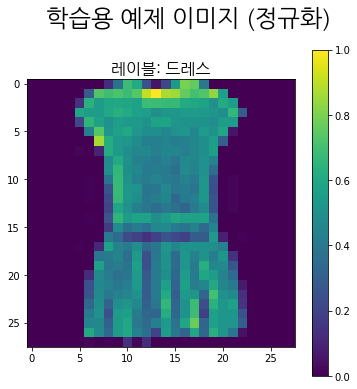

In [ ]:
### 정규화를 하고 난 후 이미지 확인!
fig2 = plt.figure(figsize=(6, 6))
ax = fig2.add_subplot()
axm = ax.imshow(train_images[3])
fig2.colorbar(axm)
fig2.suptitle('학습용 예제 이미지 (정규화)', fontproperties=nanum_prop, fontsize=24)
ax.set_title(f'레이블: {class_names[train_labels[3]]}', fontproperties=nanum_prop, fontsize=16)
ax.grid(False)

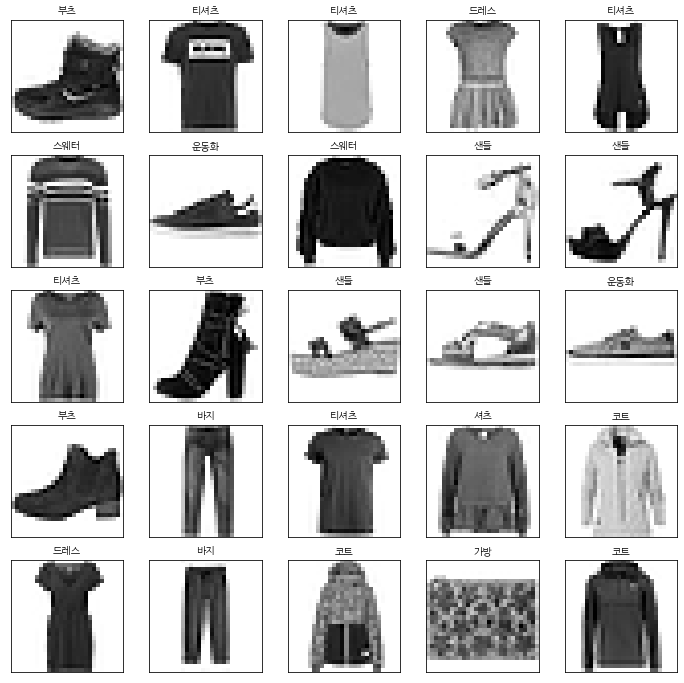

In [ ]:
### 데이터 셋 확인!
fig3 = plt.figure(figsize=(12, 12))
fig3.set_facecolor('white')
for i in range(25):
    ax = fig3.add_subplot(5, 5, i+1)
    ax.imshow(train_images[i], cmap=plt.cm.binary) # 컬러 이미지를 흑백으로 변경
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[train_labels[i]], fontproperties=nanum_prop)

In [ ]:
### 학습 모델 생성!(앞에서는 784개의 소수가 들어가고 이 모델을 통과하고 나면 소수가 10개로나온다) 
### tf.keras.layers.Dense(여기 학습 개수를 늘리면 학습량이 늘어남, activation='relu') 특징 추출하는 레이블
### tf.keras.layers.Flatten(input_shape=train_images.shape[1:])는 절대 건들지 않기!
print('모델 생성')
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=train_images.shape[1:]),
    tf.keras.layers.Dense(1419, activation='relu'),
    tf.keras.layers.Dense(1419, activation='relu'),
    tf.keras.layers.Dense(1419, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.summary()

모델 생성
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1419)              1113915   
_________________________________________________________________
dense_5 (Dense)              (None, 1419)              2014980   
_________________________________________________________________
dense_6 (Dense)              (None, 1419)              2014980   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                14200     
Total params: 5,158,075
Trainable params: 5,158,075
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### 학습 모델 컴파일 (뇌의 초기값을 만듬, -1.0 ~1.0 까지의 난수로 이루어져있음, 즉 컴퓨터마다 난수가 다르기 때문에 정확도가 다름)
print('모델 컴파일')
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

모델 컴파일


In [ ]:
### 생성한 모델 학습! (epochs = 학습량)
epochs = 20
model.fit(train_images, train_labels, 
          epochs=epochs)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4908 - accuracy: 0.8196
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3736 - accuracy: 0.8643
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3345 - accuracy: 0.8758
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3106 - accuracy: 0.8856
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2926 - accuracy: 0.8910
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2746 - accuracy: 0.8972
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2651 - accuracy: 0.9006
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2542 - accuracy: 0.9050
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2452 - accuracy: 0.9075
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.237

In [ ]:
### 학습 데이터 셋 vs. 테스트 데이터 셋 (accuracy=정확도)
print(f'{len(test_images)}개 이미지로 테스트합니다.')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print()
print(f'테스트 이미지 정확도: {test_acc}')

10000개 이미지로 테스트합니다.
313/313 - 0s - loss: 0.4837 - accuracy: 0.8783

테스트 이미지 정확도: 0.8783000111579895


In [ ]:
### 예측은 어떻게 하는 것일까? (모델 생성할때 tf.keras.layers.Dense(10)를 사용해서 10개의 숫자가 나옴)
print(f'테스트 이미지 0번 예측:\n{model.predict(test_images[562:563])}') 
print(f'실제 레이블: {test_labels[562]}') # 가장 큰 수로 모델은 예측함 (EX 테스트 이미지 3번은 두번째가 가장 크기 때문에 레이블은 1번이다)

테스트 이미지 0번 예측:
[[ -8.075871   -26.202223    -2.650085    -8.355397    -0.16589469
  -22.492594     3.8443942  -29.108137   -16.74541    -23.972942  ]]
실제 레이블: 6


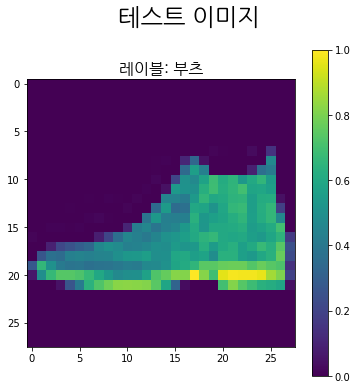

In [ ]:
### 테스트 이미지로 확인!
fig5 = plt.figure(figsize=(6, 6))
ax = fig5.add_subplot()
axm = ax.imshow(test_images[0])
fig5.colorbar(axm)
fig5.suptitle('테스트 이미지', fontproperties=nanum_prop, fontsize=24)
ax.set_title(f'레이블: {class_names[test_labels[0]]}', fontproperties=nanum_prop, fontsize=16)
ax.grid(False)

In [ ]:
### 이 사진이 A일 확률은? (Softmax 함수가 현재 가장 확률을 잘 맞춤)
print('확률 모델')
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
probability_model.summary()

확률 모델
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 10)                5158075   
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 5,158,075
Trainable params: 5,158,075
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### 테스트 이미지의 예측 확률
predictions = probability_model.predict(test_images)
print(f'테스트 이미지 0번 예측:\n{predictions[0]}')
print(f'실제 레이블: {test_labels[0]}')

print(f'예측 레이블은 확률 중 최대 확률을 선택합니다.')
print(f'테스트 이미지 0번의 최대 확률 레이블: {np.argmax(predictions[0])}')

테스트 이미지 0번 예측:
[1.4032143e-11 3.1800151e-12 7.9593132e-10 3.3332361e-09 5.4861778e-11
 3.9034335e-06 7.9446233e-12 1.8942331e-04 3.9076737e-09 9.9980670e-01]
실제 레이블: 9
예측 레이블은 확률 중 최대 확률을 선택합니다.
테스트 이미지 0번의 최대 확률 레이블: 9


In [ ]:
### 이미지 함수 정의
def draw_image(ax, prob, image, true_label):
    ax.grid(False)
    axm = ax.imshow(image, cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    predicted_label = np.argmax(prob)
    if true_label == predicted_label:
        color = 'blue'
    else:
        color = 'red'
    predicted_name = class_names[predicted_label]
    true_name = class_names[true_label]
    label = f'{predicted_name} {np.max(prob)*100:3.0f}% ({true_name})'
    ax.set_title(f'{label}', fontproperties=nanum_prop, color=color)
    
def draw_bar(ax, prob, true_label):
    ax.grid(False)
    ax.set_xticks(range(10))
    ax.set_yticks(np.arange(0, 1.2, 0.2))
    bar = ax.bar(range(10), prob, color='gray')
    ax.set_ylim((0, 1))
    predicted_label = np.argmax(prob)
    bar[predicted_label].set_color('red')
    bar[true_label].set_color('blue')

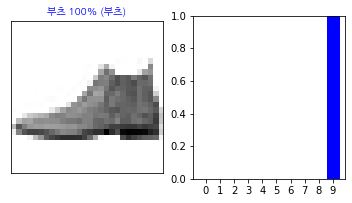

In [ ]:
### 예측 결과 == A (그래프로 확률을 나타냄)
for i in range(len(test_images)):
    if test_labels[i] == np.argmax(predictions[i]):
        break
fig6 = plt.figure(figsize=(6, 3))
ax = fig6.add_subplot(1, 2, 1)
draw_image(ax, predictions[i], test_images[i], test_labels[i])
ax = fig6.add_subplot(1, 2, 2)
draw_bar(ax, predictions[i], test_labels[i])

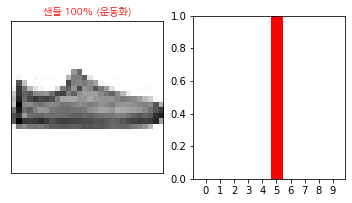

In [ ]:
### 예측 결과 == A (아슬아슬한 경우) (확률이 애매하면 무인자동차가 사고나는 것처럼 확률 때문에 일이 생기기도 함)
for i in range(len(test_images)):
    if test_labels[i] != np.argmax(predictions[i]):
        break
fig7 = plt.figure(figsize=(6, 3))
ax = fig7.add_subplot(1, 2, 1)
draw_image(ax, predictions[i], test_images[i], test_labels[i])
ax = fig7.add_subplot(1, 2, 2)
draw_bar(ax, predictions[i], test_labels[i])

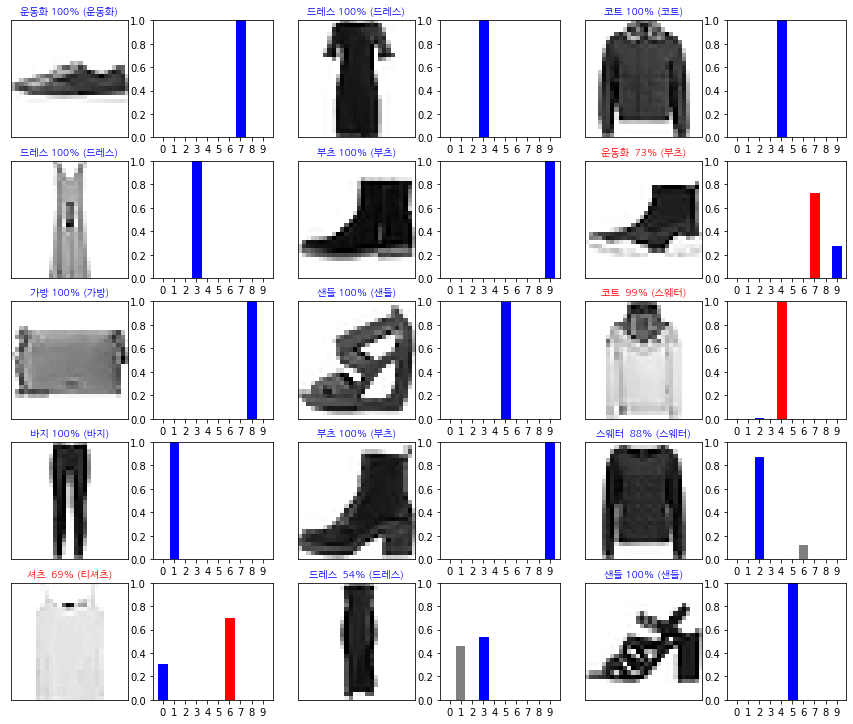

In [ ]:
### 예측 확률과 예측 결과 (사람눈에 비슷한 것은 컴퓨터도 헷갈림)
base = 4999 # base을 어디서 잡느냐에 따라서 거기에 해당하는 이미지를 표현
rows = 1 * 5
cols = 2 * 3
fig8 = plt.figure(figsize=(2.5*cols, 2.5*rows))
fig8.set_facecolor('white')
for i in range(0, rows*cols, 2):
    ax = fig8.add_subplot(rows, cols, i+1)
    draw_image(ax, predictions[base+i], test_images[base+i], test_labels[base+i])
    ax = fig8.add_subplot(rows, cols, i+2)
    draw_bar(ax, predictions[base+i], test_labels[base+i])